# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

output_data_file = "./output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate the Cities List by Using the `citipy` Library

In [53]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [54]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
CityList = []
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [55]:
query_url = url + "appid=" + weather_api_key + "&q=" + city
weather_response = requests.get(query_url)
weather_json = weather_response.json()
print(f"The weather API responded with: {weather_json}.")

The weather API responded with: {'coord': {'lon': -68.3, 'lat': -54.8}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 287.96, 'feels_like': 286.83, 'temp_min': 287.96, 'temp_max': 287.96, 'pressure': 990, 'humidity': 51}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 350}, 'clouds': {'all': 75}, 'dt': 1676933212, 'sys': {'type': 1, 'id': 8303, 'country': 'AR', 'sunrise': 1676885835, 'sunset': 1676937419}, 'timezone': -10800, 'id': 3833367, 'name': 'Ushuaia', 'cod': 200}.


In [56]:
# Print to logger
print("Beginning Data Retrieval     ")
print(f'-----------------------------------')

CityList = []

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data

query_url = url + 'APPID=' + weather_api_key + '&units=imperial'

for i, city in enumerate(cities):
    city_url = query_url + '&q=' + city.replace(' ', '+')
    print(f'Processing Record {record_count} of Set {set_count} - {city}')
    record_count +=1

    try: 
        response = requests.get(city_url).json()

        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]       
            
            # Append the City information into city_data list
        CityList.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country})

     
    except:
        print('city not found')
        
        pass


print('Data Retrieval Complete')
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------------
Processing Record 1 of Set 1 - porbandar
Processing Record 2 of Set 1 - fukue
Processing Record 3 of Set 1 - andros town
Processing Record 4 of Set 1 - kodiak
Processing Record 5 of Set 1 - castro
Processing Record 6 of Set 1 - khuzhir
Processing Record 7 of Set 1 - nepalganj
city not found
Processing Record 8 of Set 1 - port blair
Processing Record 9 of Set 1 - salinopolis
Processing Record 10 of Set 1 - korla
Processing Record 11 of Set 1 - kleck
city not found
Processing Record 12 of Set 1 - vaini
Processing Record 13 of Set 1 - mys shmidta
city not found
Processing Record 14 of Set 1 - monte alegre
Processing Record 15 of Set 1 - olafsvik
Processing Record 16 of Set 1 - chara
Processing Record 17 of Set 1 - saskylakh
Processing Record 18 of Set 1 - vanimo
Processing Record 19 of Set 1 - rikitea
Processing Record 20 of Set 1 - kongolo
Processing Record 21 of Set 1 - cabo san lucas
Processing Record 22 of Set 1 - ushua

Processing Record 192 of Set 1 - codrington
Processing Record 193 of Set 1 - la tuque
Processing Record 194 of Set 1 - aksu
Processing Record 195 of Set 1 - dikson
Processing Record 196 of Set 1 - kuito
Processing Record 197 of Set 1 - abu dhabi
Processing Record 198 of Set 1 - tabou
Processing Record 199 of Set 1 - te anau
Processing Record 200 of Set 1 - carnarvon
Processing Record 201 of Set 1 - shamary
Processing Record 202 of Set 1 - illoqqortoormiut
city not found
Processing Record 203 of Set 1 - touros
Processing Record 204 of Set 1 - port alfred
Processing Record 205 of Set 1 - bandarbeyla
Processing Record 206 of Set 1 - houma
Processing Record 207 of Set 1 - bethel
Processing Record 208 of Set 1 - georgetown
Processing Record 209 of Set 1 - hami
Processing Record 210 of Set 1 - sao filipe
Processing Record 211 of Set 1 - husavik
Processing Record 212 of Set 1 - huilong
Processing Record 213 of Set 1 - muroto
Processing Record 214 of Set 1 - peniche
Processing Record 215 of Se

Processing Record 382 of Set 1 - warqla
city not found
Processing Record 383 of Set 1 - kavaratti
Processing Record 384 of Set 1 - imbituba
Processing Record 385 of Set 1 - azul
Processing Record 386 of Set 1 - quang ngai
Processing Record 387 of Set 1 - esperance
Processing Record 388 of Set 1 - karkaralinsk
city not found
Processing Record 389 of Set 1 - mount gambier
Processing Record 390 of Set 1 - high rock
Processing Record 391 of Set 1 - oga
Processing Record 392 of Set 1 - maldonado
Processing Record 393 of Set 1 - longyearbyen
Processing Record 394 of Set 1 - kupang
Processing Record 395 of Set 1 - balgazyn
Processing Record 396 of Set 1 - puke
Processing Record 397 of Set 1 - marand
Processing Record 398 of Set 1 - brae
Processing Record 399 of Set 1 - banda aceh
Processing Record 400 of Set 1 - omboue
Processing Record 401 of Set 1 - el tocuyo
Processing Record 402 of Set 1 - mar del plata
Processing Record 403 of Set 1 - oranjestad
Processing Record 404 of Set 1 - bandar-e 

Processing Record 575 of Set 1 - sokoni
Processing Record 576 of Set 1 - port lavaca
Processing Record 577 of Set 1 - verkhnyaya toyma
Processing Record 578 of Set 1 - mana
Processing Record 579 of Set 1 - torit
Processing Record 580 of Set 1 - valdivia
Processing Record 581 of Set 1 - zeya
Processing Record 582 of Set 1 - burnie
Processing Record 583 of Set 1 - quatre cocos
Processing Record 584 of Set 1 - pathein
Processing Record 585 of Set 1 - port keats
Processing Record 586 of Set 1 - limon
Processing Record 587 of Set 1 - xinzhi
Processing Record 588 of Set 1 - wajima
Processing Record 589 of Set 1 - taltal
Processing Record 590 of Set 1 - kedzierzyn-kozle
Processing Record 591 of Set 1 - guatire
Processing Record 592 of Set 1 - gunjur
Processing Record 593 of Set 1 - mandalgovi
Processing Record 594 of Set 1 - iralaya
Processing Record 595 of Set 1 - xai-xai
Processing Record 596 of Set 1 - kavieng
Processing Record 597 of Set 1 - chimbote
Processing Record 598 of Set 1 - oyama

In [57]:
# Convert the cities weather data into a Pandas DataFrame
CityList = pd.DataFrame(CityList).sort_index(axis=1)
CityList.to_csv('cities.csv')
CityList

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Porbandar,5,IN,80,21.6422,69.6093,71.22,7.23
1,Fukue,14,JP,57,32.6881,128.8419,42.85,21.77
2,Andros Town,3,BS,65,24.7000,-77.7667,78.76,8.93
3,Kodiak,0,US,38,57.7900,-152.4072,38.71,19.57
4,Castro,100,BR,99,-24.7911,-50.0119,62.26,2.10
...,...,...,...,...,...,...,...,...
565,Gladstone,75,AU,73,-23.8500,151.2500,76.93,8.05
566,Tremedal,84,BR,80,-14.9758,-41.4108,72.34,8.21
567,Dobson,100,US,87,36.3957,-80.7226,56.35,0.00
568,Darhan,48,MN,99,49.4867,105.9228,-4.74,3.09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

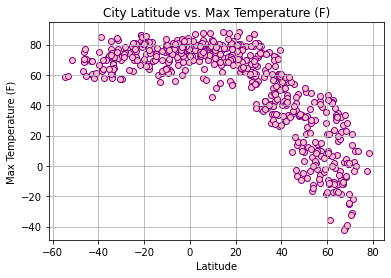

In [75]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties

x_values = CityList['Lat']
y_values = CityList['Max Temp']

plt.scatter(x_values, y_values, facecolor = "pink", edgecolor = "purple")
plt.grid()
plt.title('City Latitude vs. Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

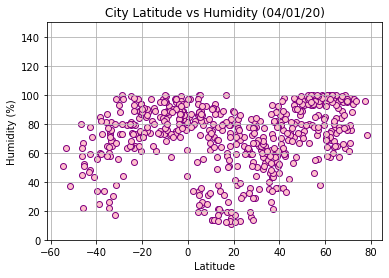

In [76]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties

x_values = CityList['Lat']
y_values = CityList['Humidity']
plt.scatter(x_values, y_values, facecolor = "pink", edgecolor = "purple")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity (04/01/20)')
plt.ylim(0, 150)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

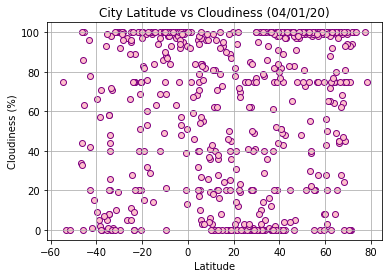

In [77]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties

x_values = CityList['Lat']
y_values = CityList['Cloudiness']
plt.scatter(x_values, y_values, facecolor = "pink", edgecolor = "purple")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness (04/01/20)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

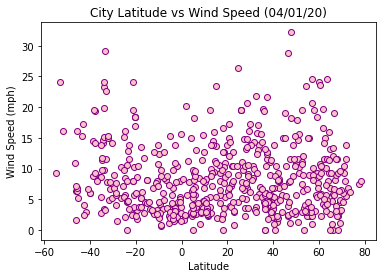

In [78]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties

x_values = CityList['Lat']
y_values = CityList['Wind Speed']
plt.scatter(x_values, y_values,facecolor = "pink", edgecolor = "purple")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed (04/01/20)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [62]:
# Define a function to create Linear Regression plots
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0, ylim)
    today = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {today}")
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.savefig(f"../Images/{hemisphere}_{x_label}_vs_{y_label}.png", bbox_inches="tight")
    return plt.plot(x_values,regress_values,"r-")

In [63]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_weather_df = CityList.loc[CityList["Lat"] >= 0]
southern_hemisphere_weather_df = CityList.loc[CityList["Lat"] < 0]

###  Temperature vs. Latitude Linear Regression Plot

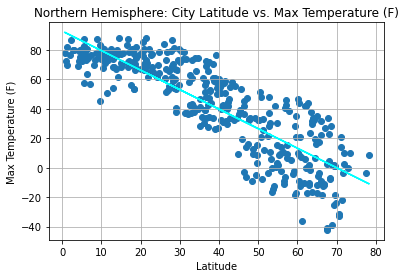

<Figure size 432x288 with 0 Axes>

In [64]:
# Linear regression on Northern Hemisphere
xval = northern_hemisphere_weather_df['Lat']
yval = northern_hemisphere_weather_df['Max Temp']

linear_regression = linregress(xval,yval)
slope, intercept, rvalue, pvalue, stderr = linregress(xval, yval) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = xval*slope + intercept

plt.scatter(xval, yval)
plt.plot(xval, regress, color='cyan')
plt.title('Northern Hemisphere: City Latitude vs. Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(equation, (12,264))
plt.grid()
plt.show()
plt.savefig('Northern_Hemi_CityLatitude_vs_Max_Temp.png')

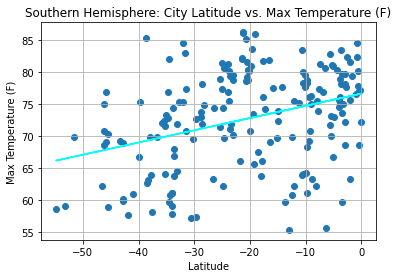

<Figure size 432x288 with 0 Axes>

In [65]:
# Linear regression on Southern Hemisphere
linear_regression = linregress(southern_hemisphere_weather_df['Lat'], southern_hemisphere_weather_df['Max Temp'])
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemisphere_weather_df['Lat'], southern_hemisphere_weather_df['Max Temp']) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = southern_hemisphere_weather_df['Lat']*slope + intercept

plt.scatter(southern_hemisphere_weather_df['Lat'], southern_hemisphere_weather_df['Max Temp'])
plt.plot(southern_hemisphere_weather_df['Lat'], regress, color='cyan')
plt.title('Southern Hemisphere: City Latitude vs. Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(equation, (-47,307))
plt.grid()
plt.show()
plt.savefig('Southern_Hemi_CityLatitude_vs_Max_Temp.png')

### Humidity vs. Latitude Linear Regression Plot

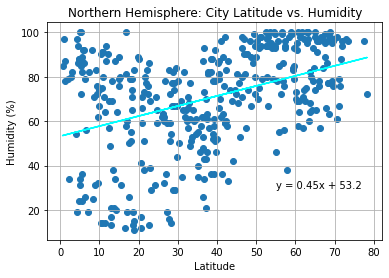

<Figure size 432x288 with 0 Axes>

In [66]:
# Northern Hemisphere
linear_regression = linregress(northern_hemisphere_weather_df['Lat'], northern_hemisphere_weather_df['Humidity'])
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemisphere_weather_df['Lat'], northern_hemisphere_weather_df['Humidity']) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = northern_hemisphere_weather_df['Lat']*slope + intercept

plt.scatter(northern_hemisphere_weather_df['Lat'], northern_hemisphere_weather_df['Humidity'])
plt.plot(northern_hemisphere_weather_df['Lat'], regress, color='cyan')
plt.title('Northern Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(equation, (55,30))
plt.grid()
plt.show()
plt.savefig('Northern_Hemi_CityLatitude_vs_Humidity.png')

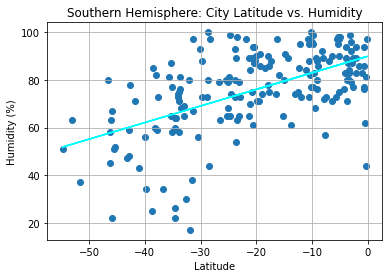

<Figure size 432x288 with 0 Axes>

In [67]:
# Southern Hemisphere
linear_regression = linregress(southern_hemisphere_weather_df['Lat'], southern_hemisphere_weather_df['Humidity'])
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemisphere_weather_df['Lat'], southern_hemisphere_weather_df['Humidity']) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = southern_hemisphere_weather_df['Lat']*slope + intercept

plt.scatter(southern_hemisphere_weather_df['Lat'], southern_hemisphere_weather_df['Humidity'])
plt.plot(southern_hemisphere_weather_df['Lat'], regress, color='cyan')
plt.title('Southern Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(equation, (-56,10))
plt.grid()
plt.show()
plt.savefig('Southern_Hemi_CityLatitude_vs_Humidity.png')

### Cloudiness vs. Latitude Linear Regression Plot

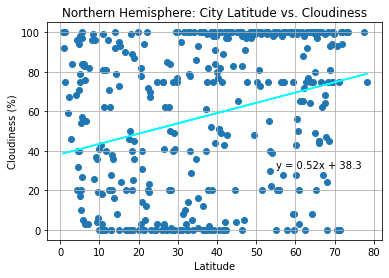

<Figure size 432x288 with 0 Axes>

In [68]:
# Northern Hemisphere
linear_regression = linregress(northern_hemisphere_weather_df['Lat'], northern_hemisphere_weather_df['Cloudiness'])
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemisphere_weather_df['Lat'], northern_hemisphere_weather_df['Cloudiness']) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = northern_hemisphere_weather_df['Lat']*slope + intercept

plt.scatter(northern_hemisphere_weather_df['Lat'], northern_hemisphere_weather_df['Cloudiness'])
plt.plot(northern_hemisphere_weather_df['Lat'], regress, color='cyan')
plt.title('Northern Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(equation, (55,31))
plt.grid()
plt.show()
plt.savefig('Northern_Hemi_CityLatitude_vs_Cloudiness.png')

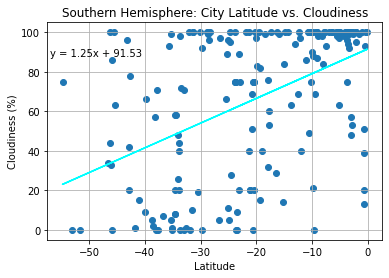

<Figure size 432x288 with 0 Axes>

In [69]:
# Southern Hemisphere
linear_regression = linregress(southern_hemisphere_weather_df['Lat'], southern_hemisphere_weather_df['Cloudiness'])
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemisphere_weather_df['Lat'], southern_hemisphere_weather_df['Cloudiness']) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = southern_hemisphere_weather_df['Lat']*slope + intercept

plt.scatter(southern_hemisphere_weather_df['Lat'], southern_hemisphere_weather_df['Cloudiness'])
plt.plot(southern_hemisphere_weather_df['Lat'], regress, color='cyan')
plt.title('Southern Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(equation, (-57,88))
plt.grid()
plt.show()
plt.savefig('Southern_Hemi_CityLatitude_vs_Cloudiness.png')

### Wind Speed vs. Latitude Linear Regression Plot

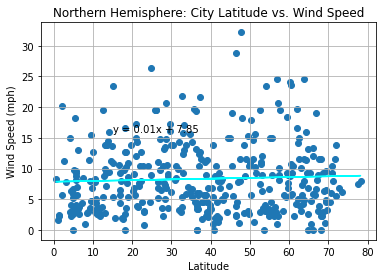

<Figure size 432x288 with 0 Axes>

In [70]:
# Northern Hemisphere
linear_regression = linregress(northern_hemisphere_weather_df['Lat'], northern_hemisphere_weather_df['Wind Speed'])
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemisphere_weather_df['Lat'], northern_hemisphere_weather_df['Wind Speed']) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = northern_hemisphere_weather_df['Lat']*slope + intercept

plt.scatter(northern_hemisphere_weather_df['Lat'], northern_hemisphere_weather_df['Wind Speed'])
plt.plot(northern_hemisphere_weather_df['Lat'], regress, color='cyan')
plt.title('Northern Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(equation, (15,16))
plt.grid()
plt.show()
plt.savefig('Northern_Hemi_CityLatitude_vs_Wind_Speed.png')

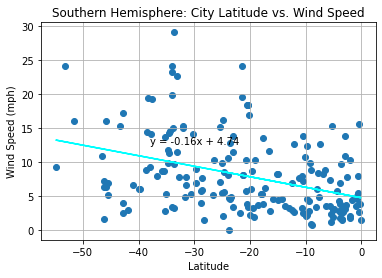

<Figure size 432x288 with 0 Axes>

In [71]:
# Southern Hemisphere
linear_regression = linregress(southern_hemisphere_weather_df['Lat'], southern_hemisphere_weather_df['Wind Speed'])
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemisphere_weather_df['Lat'], southern_hemisphere_weather_df['Wind Speed']) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = southern_hemisphere_weather_df['Lat']*slope + intercept

plt.scatter(southern_hemisphere_weather_df['Lat'], southern_hemisphere_weather_df['Wind Speed'])
plt.plot(southern_hemisphere_weather_df['Lat'], regress, color='cyan')
plt.title('Southern Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(equation, (-38,12.7))
plt.grid()
plt.show()
plt.savefig('Southern_Hemi_CityLatitude_vs_Wind_Speed.png')

**Discussion about the linear relationship:** 

The northern hemisphere has a strong, negative correlation between maximum temperature and latitude. As latitude increases, maximum temperature steadily decreases, and vice versa.

The southern hemisphere has a weak, positive correlation between maximum temperature and latitude. As latitude increases, maximum temperature slightly increases, but not by much. As latitude decreases, maximum temperature slightly decreases, but not by much.

There is a weak, positive correlation between humidity and latitude for both the northern and southern hemispheres. As latitude increases, humidity level increases slightly, and as latitude decreases, humidity level decreases slightly.

Latitude does not have much of an influence on cloudiness for the southern hemisphere, as there is a weak, positive correlation between latitude and cloudiness.

The correlation between wind speed and latitude is very weak (almost none) for the northern hemisphere. For the southern hemisphere, there is a weak, negative correlation between wind speed and latitude. As latitude decreases, wind speed slightly increases, and as latitude increases, wind speed slightly decreases. The correlation between wind speed and latitude for the southern hemisphere is stronger than for the northern hemisphere.